(3998, 2)
Epoch 1/30
32/32 - 1s - loss: 0.6669 - accuracy: 0.7476
Epoch 2/30
32/32 - 0s - loss: 0.4337 - accuracy: 0.9197
Epoch 3/30
32/32 - 0s - loss: 0.3119 - accuracy: 0.9380
Epoch 4/30
32/32 - 0s - loss: 0.2478 - accuracy: 0.9455
Epoch 5/30
32/32 - 0s - loss: 0.2139 - accuracy: 0.9512
Epoch 6/30
32/32 - 0s - loss: 0.1927 - accuracy: 0.9560
Epoch 7/30
32/32 - 0s - loss: 0.1799 - accuracy: 0.9565
Epoch 8/30
32/32 - 0s - loss: 0.1735 - accuracy: 0.9607
Epoch 9/30
32/32 - 0s - loss: 0.1636 - accuracy: 0.9637
Epoch 10/30
32/32 - 0s - loss: 0.1533 - accuracy: 0.9660
Epoch 11/30
32/32 - 0s - loss: 0.1489 - accuracy: 0.9667
Epoch 12/30
32/32 - 0s - loss: 0.1381 - accuracy: 0.9722
Epoch 13/30
32/32 - 0s - loss: 0.1424 - accuracy: 0.9682
Epoch 14/30
32/32 - 0s - loss: 0.1499 - accuracy: 0.9680
Epoch 15/30
32/32 - 0s - loss: 0.1327 - accuracy: 0.9717
Epoch 16/30
32/32 - 0s - loss: 0.1361 - accuracy: 0.9717
Epoch 17/30
32/32 - 0s - loss: 0.1357 - accuracy: 0.9727
Epoch 18/30
32/32 - 0s - loss:

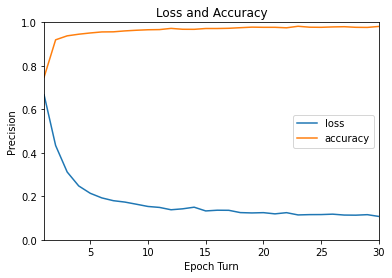

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.utils import to_categorical
from keras import models, layers, regularizers
from keras.datasets import mnist
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from keras.optimizers import RMSprop
import time
from matplotlib.pyplot import MultipleLocator
# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
#print(dataframe.head())
# The last element contains the labels
labels = raw_data[:, -1]
 
# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]
 
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=21)
 
# Normalize to [0, 1]
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)
 
train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)
train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)
 
#use one hot code = output 2 dimension  [0. 1.] & [1. 0.]
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(train_labels.shape)

#record start time
time_start=time.time()
 
model = models.Sequential()
model.add(layers.Dense(units=64, activation='relu',input_shape=(140*1,),kernel_regularizer=regularizers.l1(0.0001)))
model.add(layers.Dropout(0.01))
model.add(layers.Dense(units=64, activation='relu', kernel_regularizer=regularizers.l1(0.0001)))
model.add(layers.Dropout(0.01))
#softmax can better perform in classiffication
model.add(layers.Dense(units=2, activation='softmax'))
# compile model
model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# train the network, epochs=how many turn, batch_size=how much data every tarining turn
history=model.fit(train_data, train_labels, epochs=30, batch_size=128, verbose=2)
# model performance
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print("test_loss:", test_loss, "test_accuracy:", test_accuracy)
#record finish time
time_end=time.time()
print('totally time cost',time_end-time_start) #give duration
x=range(1,31)
y1=history.history['loss']
y2=history.history['accuracy']
plt.xlabel("Epoch Turn") 
plt.ylabel("Precision") 
plt.title('Loss and Accuracy')  #标题
#plt.plot(x,y)
#common parameter：color,label,linewidth,linestyle,marker等
plt.plot(x, y1,label='loss')
plt.plot(x, y2,label='accuracy')#'b'指：color='blue'
plt.axis([1,30,0,1])#set axis range ([xmin,xmax,ymin,ymax])
plt.legend()
plt.show()

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
Epoch 1/30
32/32 - 1s - loss: 0.6721 - accuracy: 0.5943
Epoch 2/30
32/32 - 1s - loss: 0.6175 - accuracy: 0.6471
Epoch 3/30
32/32 - 1s - loss: 0.5030 - accuracy: 0.7601
Epoch 4/30
32/32 - 1s - loss: 0.4009 - accuracy: 0.8294
Epoch 5/30
32/32 - 1s - loss: 0.2936 - accuracy: 0.8874
Epoch 6/30
32/32 - 1s - loss: 0.2018 - accuracy: 0.9392
Epoch 7/30
32/32 - 1s - loss: 0.1623 - accuracy: 0.9535
Epoch 8/30
32/32 - 1s - loss: 0.1420 - accuracy: 0.9590
Epoch 9/30
32/32 - 1s - loss: 0.1176 - accuracy: 0.9682
Epoch 10/30
32/32 - 1s - loss: 0.1019 - accuracy: 0.9735
Epoch 11/30
32/32 - 1s - loss: 0.0942 - accuracy: 0.9735
Epoch 12/30
32/32 - 1s - loss: 0.0872 - accuracy: 0.9767
Epoch 13/30
32/32 - 1s - loss: 0.0769 - accuracy: 0.9775
Epoch 14/30
32/32 - 1s - loss: 0.0620 - accuracy: 0.9827
Epoch 15/30
32/32 - 1s - loss: 0.0654 - accuracy: 0.9845
Epoch 16/30
32/32 - 1s - loss: 0.0613 - accuracy: 0.9842
Epoch 17/30
32/32 - 1s - loss: 0.0648

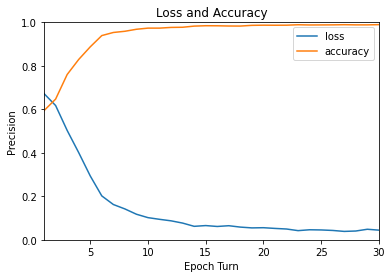

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.utils import to_categorical
from keras import models, layers, regularizers
import pandas as pd
import tensorflow as tf
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense,Reshape
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau
import time

dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
#print(dataframe.head())
# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=21)

# Normalize to [0, 1]
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)
train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)
#one hot code
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
#column 3 : channel
train_data=train_data[...,None]
test_data=test_data[...,None]
#print(train_data.shape)
#print(train_labels.shape)
print(train_labels)
time_start=time.time()
model=Sequential()
#first convolution
model.add(layers.Conv1D(filters=4,kernel_size=8,strides=1,padding="VALID",activation='relu'))
#first pooling
model.add(layers.MaxPool1D(pool_size=3,strides=2,padding="VALID")) #padding type : same , valid & full
model.add(layers.Dropout(rate=0.1)) #kill 10% neruons
model.add(layers.Conv1D(filters=16,kernel_size=8,strides=1,padding="VALID",activation='relu')) #second convolution
model.add(layers.MaxPool1D(pool_size=3,strides=2,padding="VALID")) #second polling
model.add(layers.Dropout(rate=0.1))
model.add(layers.Conv1D(filters=32, kernel_size=8, strides=1, padding='VALID', activation='relu'))
model.add(layers.AvgPool1D(pool_size=3, strides=2, padding='VALID'))#pooling type: avg & max
model.add(layers.Dropout(rate=0.1))
model.add(layers.Conv1D(filters=64, kernel_size=8, strides=1, padding='VALID', activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(units=128,activation="relu"))
model.add(layers.Dropout(rate=0.1))
#output unit =0 or 1
model.add(layers.Dense(units=2,activation="softmax"))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_data, train_labels, epochs=30,batch_size=128,verbose=2)
score = model.evaluate(test_data, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) # first is loss, second is [metrics]
time_end=time.time()
print('totally cost',time_end-time_start)
x=range(1,31)
y1=history.history['loss']
y2=history.history['accuracy']
plt.xlabel("Epoch Turn") 
plt.ylabel("Precision") 
plt.title('Loss and Accuracy')  
plt.plot(x, y1,label='loss')
plt.plot(x, y2,label='accuracy')#'b'指：color='blue'
plt.axis([1,30,0,1])#set axis range ([xmin,xmax,ymin,ymax])
plt.legend()

Epoch 1/30
32/32 - 17s - loss: 0.5976 - accuracy: 0.6636
Epoch 2/30
32/32 - 12s - loss: 0.1081 - accuracy: 0.9712
Epoch 3/30
32/32 - 12s - loss: 0.0824 - accuracy: 0.9775
Epoch 4/30
32/32 - 12s - loss: 0.0662 - accuracy: 0.9817
Epoch 5/30
32/32 - 12s - loss: 0.0592 - accuracy: 0.9832
Epoch 6/30
32/32 - 12s - loss: 0.0609 - accuracy: 0.9837
Epoch 7/30
32/32 - 12s - loss: 0.0594 - accuracy: 0.9840
Epoch 8/30
32/32 - 12s - loss: 0.0497 - accuracy: 0.9845
Epoch 9/30
32/32 - 12s - loss: 0.0401 - accuracy: 0.9885
Epoch 10/30
32/32 - 12s - loss: 0.0476 - accuracy: 0.9855
Epoch 11/30
32/32 - 12s - loss: 0.0424 - accuracy: 0.9887
Epoch 12/30
32/32 - 12s - loss: 0.0377 - accuracy: 0.9890
Epoch 13/30
32/32 - 12s - loss: 0.0360 - accuracy: 0.9910
Epoch 14/30
32/32 - 12s - loss: 0.0339 - accuracy: 0.9910
Epoch 15/30
32/32 - 12s - loss: 0.0331 - accuracy: 0.9905
Epoch 16/30
32/32 - 12s - loss: 0.0337 - accuracy: 0.9910
Epoch 17/30
32/32 - 12s - loss: 0.0365 - accuracy: 0.9900
Epoch 18/30
32/32 - 12s

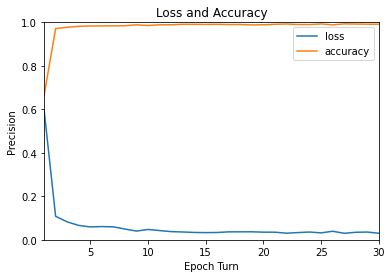

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import LSTM
from keras.utils import to_categorical
from keras import models, layers, regularizers
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau
import time

dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
#print(dataframe.head())
# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=21)

# Normalize to [0, 1]
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)
train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_data=train_data[...,None]
test_data=test_data[...,None]

time_start=time.time()

model=Sequential()
model.add(LSTM(64, return_sequences=True,input_shape=(140,1)))   
model.add(LSTM(64, return_sequences=True))  
model.add(LSTM(64))  
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_data, train_labels, epochs=30,batch_size=128,verbose=2)
score = model.evaluate(test_data, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
time_end=time.time()
time_cost=time_end-time_start
print('total time cost=',time_cost)
x=range(1,31)
#print('###########',len(history.history['accuracy']))
#print('###########',len(history.history['loss']))
#print(len)
y1=history.history['loss']
y2=history.history['accuracy']

plt.xlabel("Epoch Turn") 
plt.ylabel("Precision") 
plt.title('Loss and Accuracy')  #标题
#plt.plot(x,y)
#常见线的属性有：color,label,linewidth,linestyle,marker等
plt.plot(x, y1,label='loss')
plt.plot(x, y2,label='accuracy')#'b'指：color='blue'
plt.axis([1,30,0,1])#set axis range ([xmin,xmax,ymin,ymax])
plt.legend()